+---------+--------------+--------------+
| Dataset | Images Shape | Labels Shape |
+---------+--------------+--------------+
|  Train  | (60000, 784) |   (60000,)   |
|  Test   | (10000, 784) |   (10000,)   |
+---------+--------------+--------------+


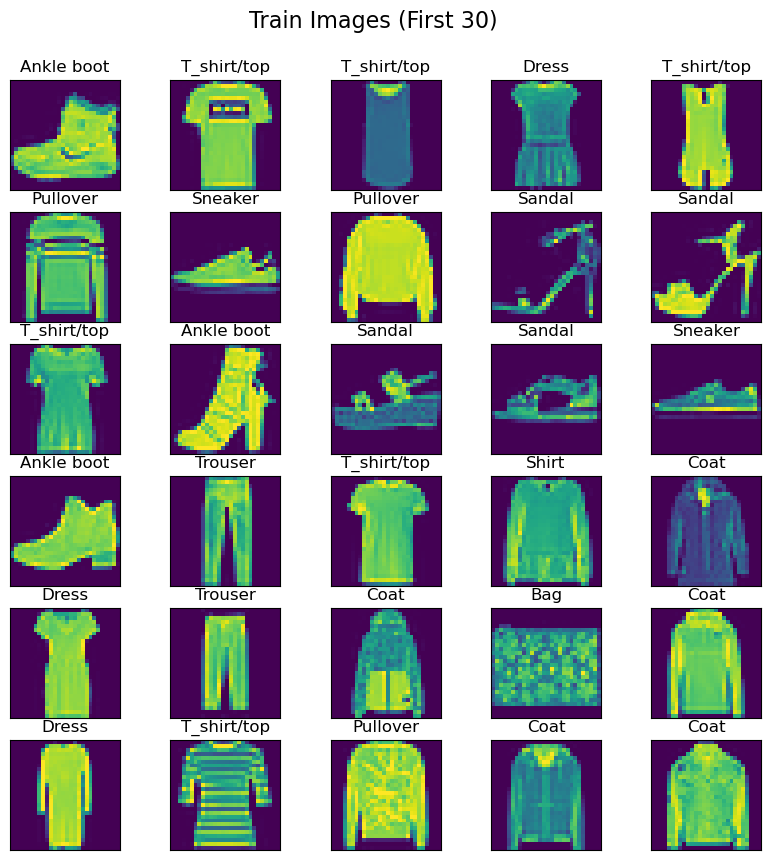

In [1]:
from data_loader import load_mnist, show_image
import os
current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)
data_dir = os.path.join(project_root, 'data')
train_images, train_labels = load_mnist(data_dir, kind='train')
test_images, test_labels = load_mnist(data_dir, kind='t10k')
show_image(train_images, train_labels, test_images, test_labels)

In [2]:
from cnn_model import CNN
model = CNN()
model.print_model()

Layer (type)         Output Shape         Param #
Conv2D               (6, 28, 28)          156
BatchNorm            (6, 28, 28)          12
ReLU                 (6, 28, 28)          0
MaxPool2D            (6, 14, 14)          0
Conv2D               (16, 10, 10)         2416
BatchNorm            (16, 10, 10)         32
ReLU                 (16, 10, 10)         0
MaxPool2D            (16, 5, 5)           0
FullyConnected       (120,)               48120
ReLU                 (120,)               0
FullyConnected       (84,)                10164
ReLU                 (84,)                0
FullyConnected       (10,)                850
Total params: 61750


In [3]:
from train import train
max_steps = 5000
batch_size = 64
learning_rate = 0.0005
train(train_images, train_labels, model, max_steps, batch_size, learning_rate)

Step: 1/5000, Loss: 3.2231, Accuracy: 0.0469
Step: 2/5000, Loss: 3.1009, Accuracy: 0.0781
Step: 3/5000, Loss: 2.8735, Accuracy: 0.1250
Step: 4/5000, Loss: 3.2798, Accuracy: 0.0625
Step: 5/5000, Loss: 3.2397, Accuracy: 0.0625
Step: 6/5000, Loss: 2.9717, Accuracy: 0.0938
Step: 7/5000, Loss: 2.7894, Accuracy: 0.1250
Step: 8/5000, Loss: 2.8940, Accuracy: 0.1094
Step: 9/5000, Loss: 2.6142, Accuracy: 0.1719
Step: 10/5000, Loss: 2.6209, Accuracy: 0.1250
Step: 11/5000, Loss: 2.6717, Accuracy: 0.0781
Step: 12/5000, Loss: 2.1869, Accuracy: 0.2812
Step: 13/5000, Loss: 2.6852, Accuracy: 0.1562
Step: 14/5000, Loss: 2.3925, Accuracy: 0.1875
Step: 15/5000, Loss: 2.3279, Accuracy: 0.2656
Step: 16/5000, Loss: 2.3660, Accuracy: 0.1875
Step: 17/5000, Loss: 2.1608, Accuracy: 0.3125
Step: 18/5000, Loss: 2.1059, Accuracy: 0.2031
Step: 19/5000, Loss: 2.2069, Accuracy: 0.3438
Step: 20/5000, Loss: 2.3822, Accuracy: 0.2344
Step: 21/5000, Loss: 1.9138, Accuracy: 0.3594
Step: 22/5000, Loss: 2.1916, Accuracy: 0.23

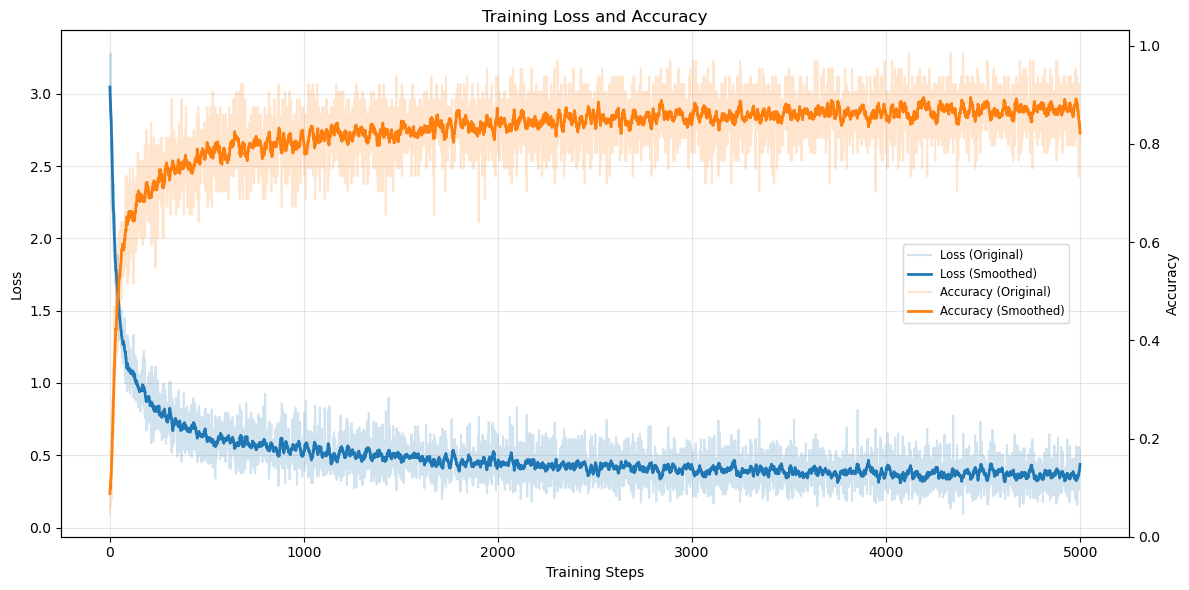

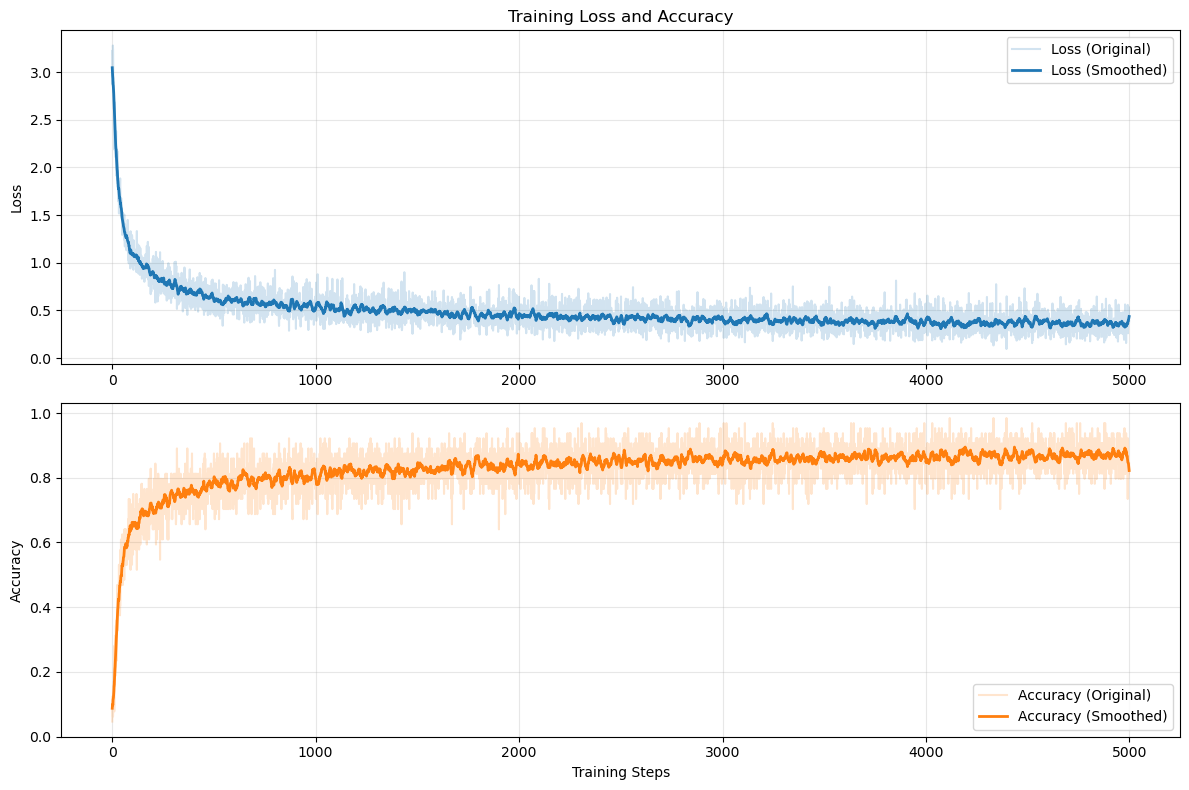

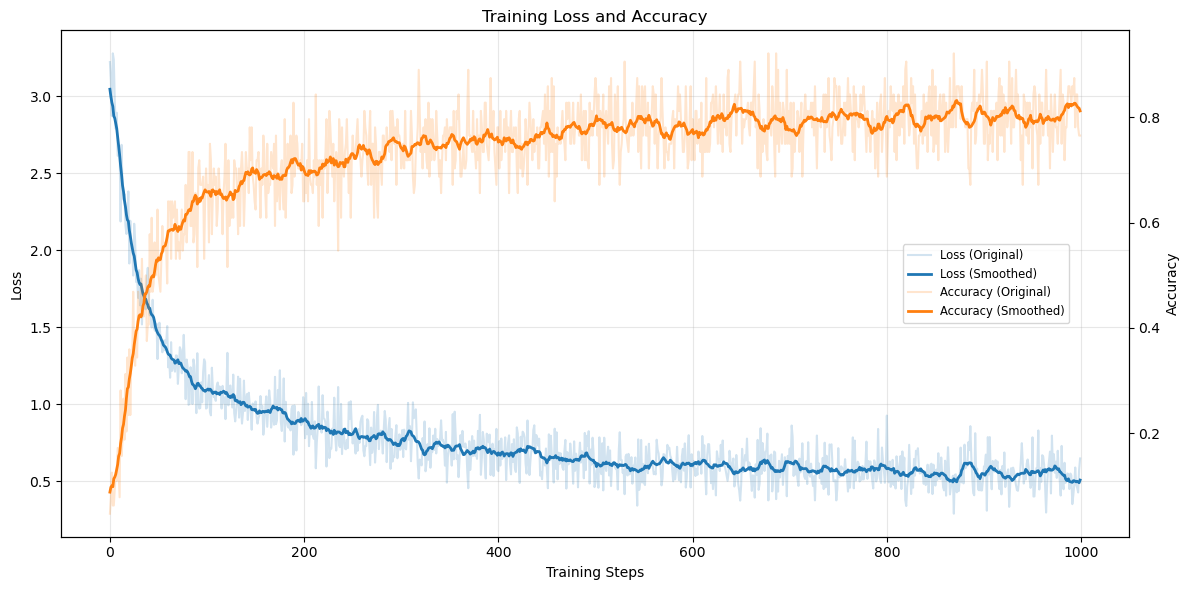

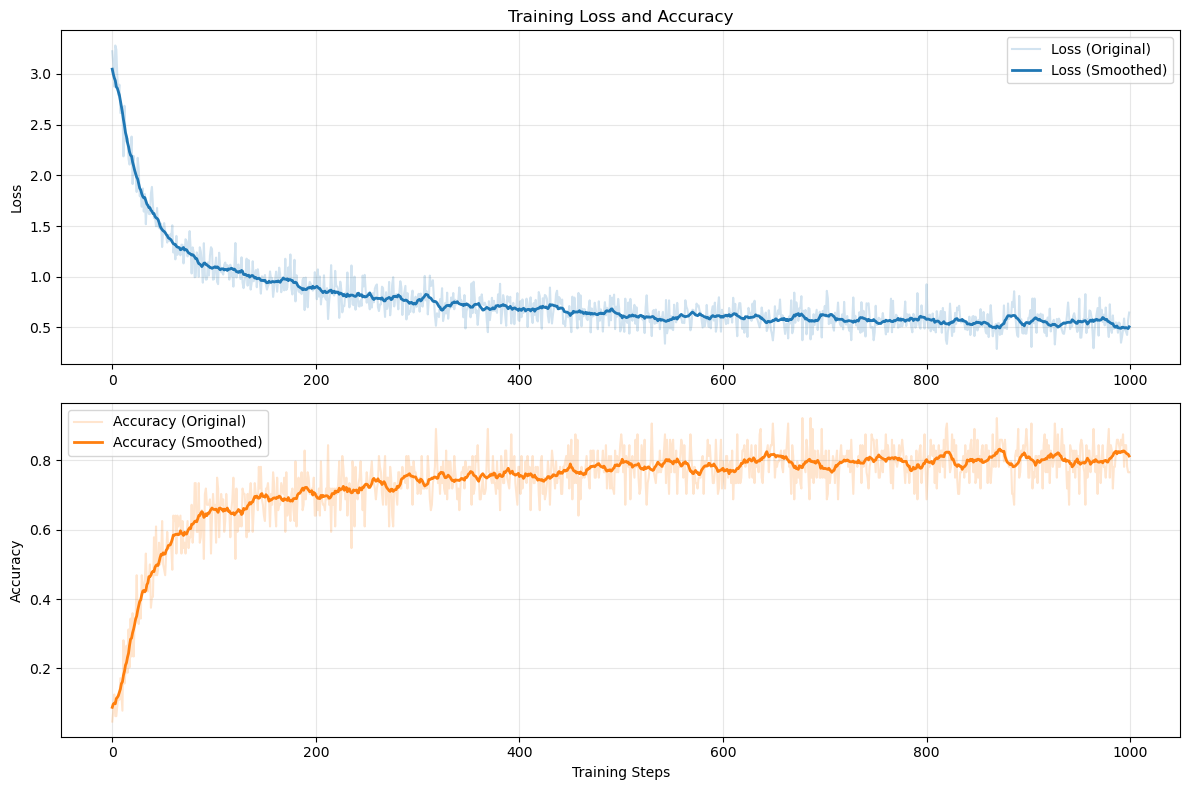

In [3]:
from plot import *
log_dir = os.path.join(current_dir, 'logs')
losses = np.load(os.path.join(log_dir, 'losses.npy'))
accuracies = np.load(os.path.join(log_dir, 'accuracies.npy'))
plot_loss_accuracy1(losses=losses, accuracies=accuracies)
plot_loss_accuracy2(losses=losses, accuracies=accuracies)
losses = losses[0:1000]
accuracies = accuracies[0:1000]
plot_loss_accuracy1(losses=losses, accuracies=accuracies)
plot_loss_accuracy2(losses=losses, accuracies=accuracies)

model                   accuracy
model_step1000.npz       0.8016
model_step2000.npz       0.8264
model_step3000.npz       0.8462
model_step4000.npz       0.8534
model_step5000.npz       0.8612


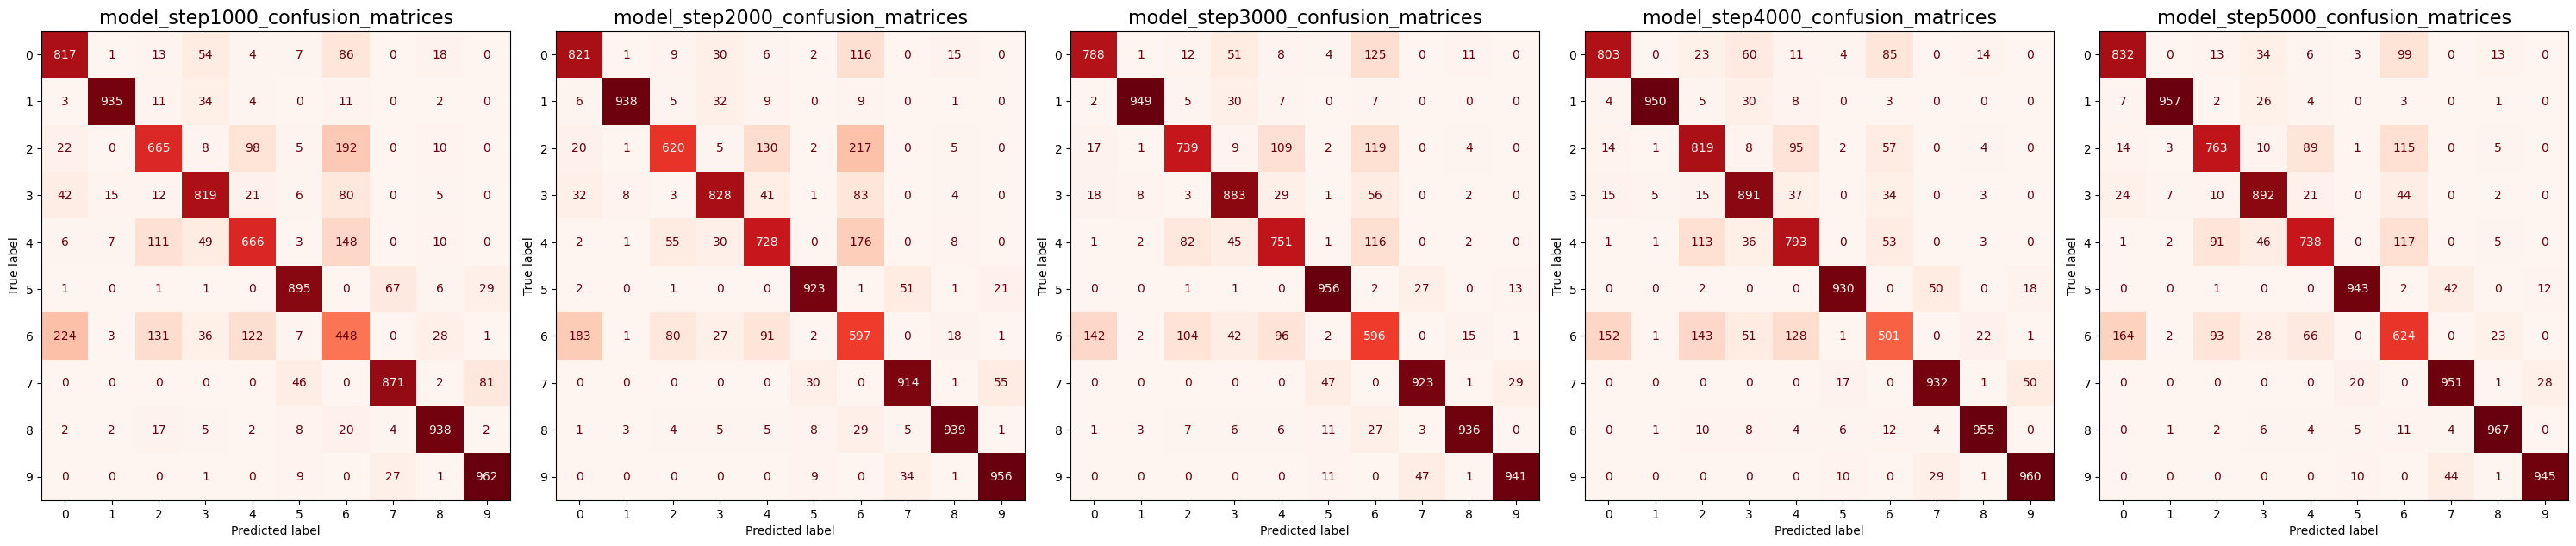

In [4]:
from predict import predict
# test_mask = np.random.choice(len(test_images), 1000, replace=False)
# test_images = test_images[test_mask]
# test_labels = test_labels[test_mask]
predict(test_images=test_images, test_labels=test_labels)